**Data Exploration**

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
original_df=pd.read_csv("used_cars_UK.csv",index_col=0)

print(original_df.head(5))
# Data Description
data_description = original_df.describe()

# Data Info
data_info = original_df.info()

# Missing Values
missing_values = original_df.isnull().sum()

data_description, missing_values


            title  Price  Mileage(miles)  Registration_Year  Previous Owners  \
0     SKODA Fabia   6900           70189               2016              3.0   
1  Vauxhall Corsa   1495           88585               2008              4.0   
2     Hyundai i30    949          137000               2011              NaN   
3      MINI Hatch   2395           96731               2010              5.0   
4  Vauxhall Corsa   1000           85000               2013              NaN   

  Fuel type  Body type Engine Gearbox  Doors  Seats Emission Class  \
0    Diesel  Hatchback   1.4L  Manual    5.0    5.0         Euro 6   
1    Petrol  Hatchback   1.2L  Manual    3.0    5.0         Euro 4   
2    Petrol  Hatchback   1.4L  Manual    5.0    5.0         Euro 5   
3    Petrol  Hatchback   1.4L  Manual    3.0    4.0         Euro 4   
4    Diesel  Hatchback   1.3L  Manual    5.0    5.0         Euro 5   

  Service history  
0             NaN  
1            Full  
2             NaN  
3            Full 

(              Price  Mileage(miles)  Registration_Year  Previous Owners  \
 count   3685.000000    3.685000e+03        3685.000000      2276.000000   
 mean    5787.145726    8.132816e+04        2011.835007         2.807557   
 std     4480.810572    3.942083e+04           5.092566         1.546028   
 min      400.000000    1.000000e+00        1953.000000         1.000000   
 25%     2490.000000    5.698400e+04        2008.000000         2.000000   
 50%     4000.000000    8.000000e+04        2012.000000         3.000000   
 75%     7995.000000    1.030000e+05        2015.000000         4.000000   
 max    33900.000000    1.110100e+06        2023.000000         9.000000   
 
              Doors        Seats  
 count  3660.000000  3650.000000  
 mean      4.321038     4.900274  
 std       0.986902     0.577200  
 min       2.000000     2.000000  
 25%       3.000000     5.000000  
 50%       5.000000     5.000000  
 75%       5.000000     5.000000  
 max       5.000000     7.000000  

In [4]:
#Handle missing values by removing column with many missing values
original_df=original_df.drop('Service history', axis=1)

In [5]:
#Engine is more sutiable as a numeric variable
original_df['Engine'] = original_df['Engine'].str.replace('L', '').astype(float)

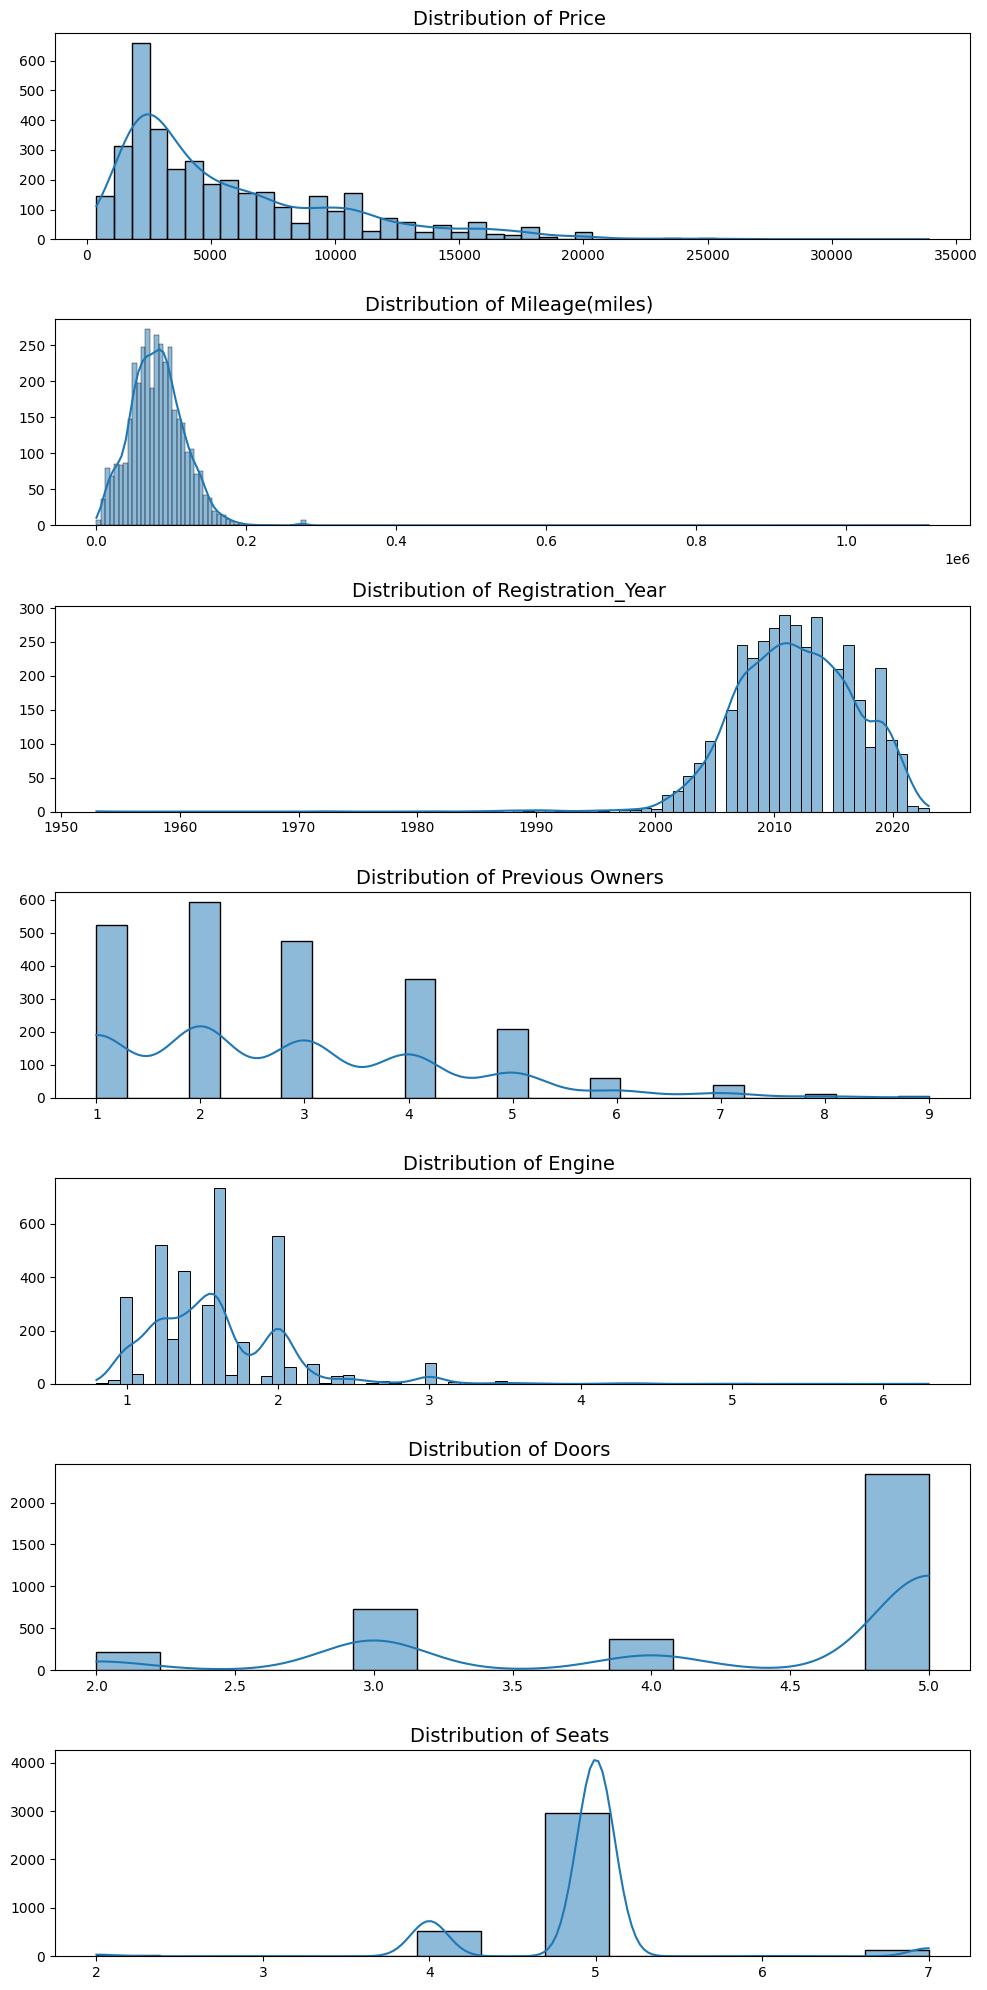

In [6]:
# Defining the numerical and categorical columns from the refined dataset
numerical_cols = original_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = original_df.select_dtypes(include=['object']).columns.tolist()

# Plotting distributions for numerical variables after removing extreme outliers
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(10, 20))

# Histograms for numerical variables with outliers removed
for i, col in enumerate(numerical_cols):
    sns.histplot(original_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col} ', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()


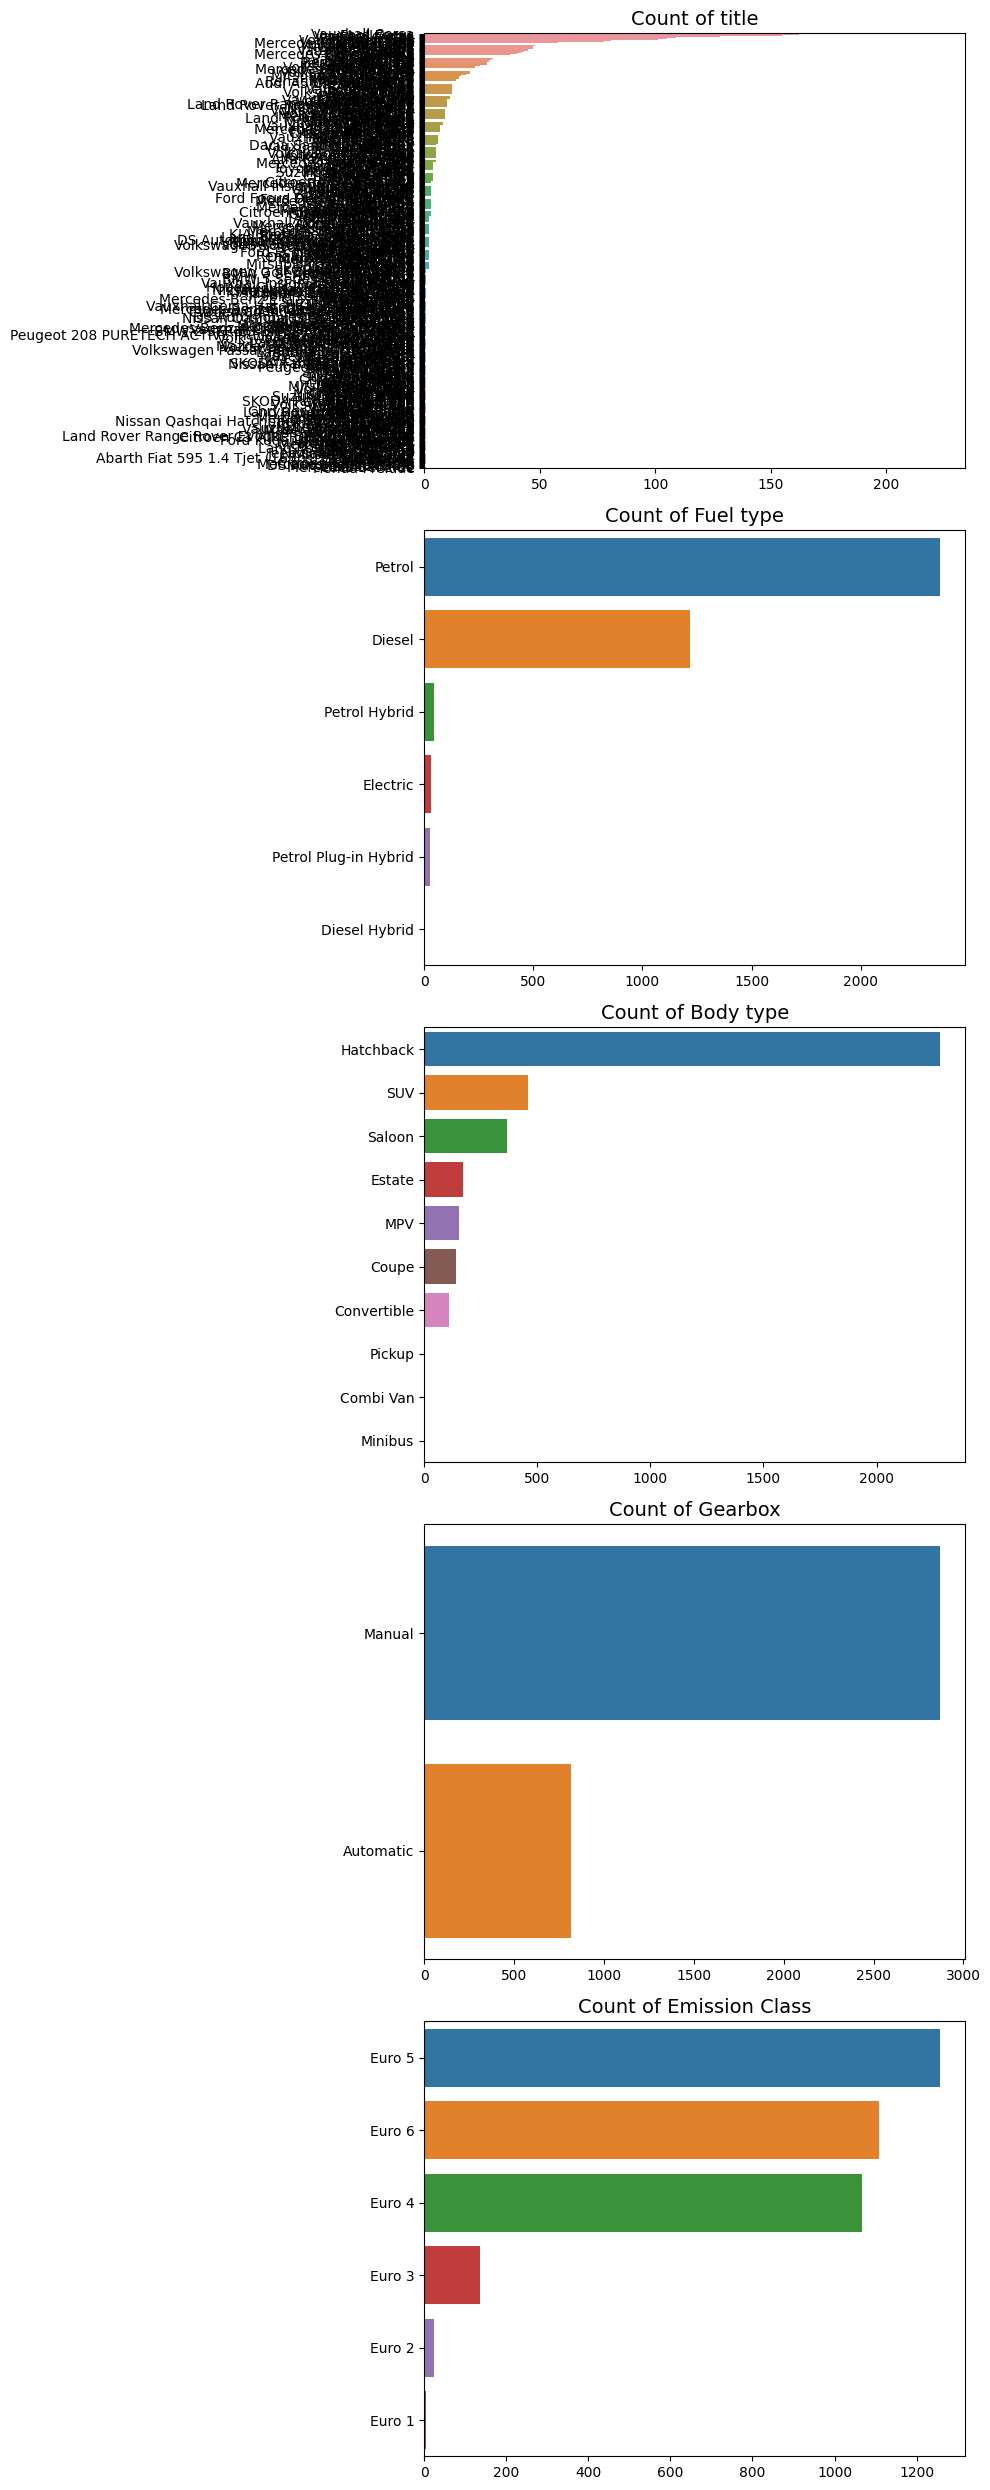

In [7]:
# Plotting distributions for categorical variables
fig, axes = plt.subplots(nrows=len(categorical_cols), ncols=1, figsize=(10, 5 * len(categorical_cols)))

# Count plots for categorical variables
for i, col in enumerate(categorical_cols):
    sns.countplot(y=original_df[col], ax=axes[i], order=original_df[col].value_counts().index)
    axes[i].set_title(f'Count of {col}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

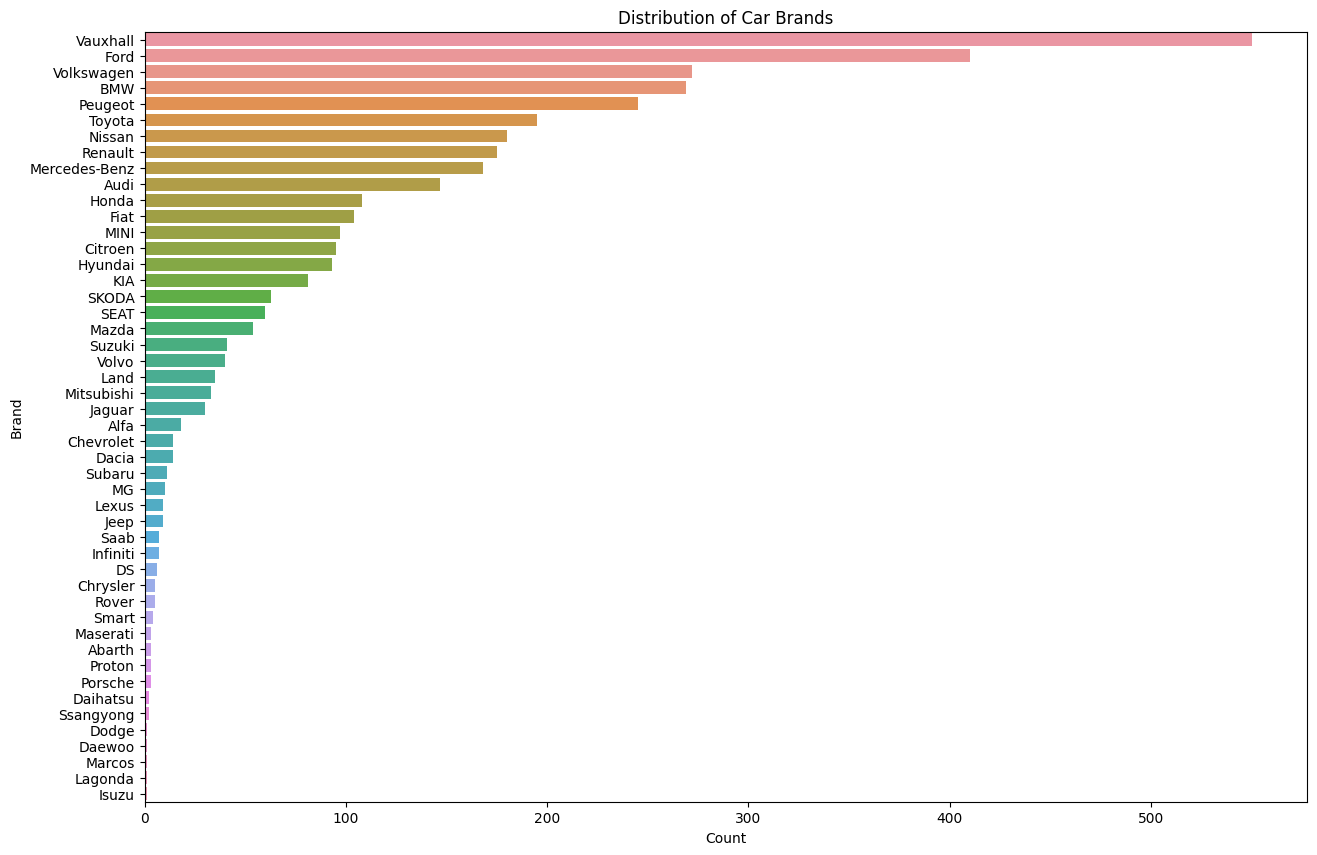

In [8]:
#Actally I want to see the distribution of brand, instead of car titles because too many models makes the plot messy

#Create the brand column
original_df['Brand'] = original_df['title'].apply(lambda x: x.split()[0])
original_df = original_df.drop(['title'], axis=1)
#plot the distribution of car brands.
plt.figure(figsize=(15, 10))
brand_order = original_df['Brand'].value_counts().index
sns.countplot(y='Brand', data=original_df, order=brand_order)
plt.title('Distribution of Car Brands')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

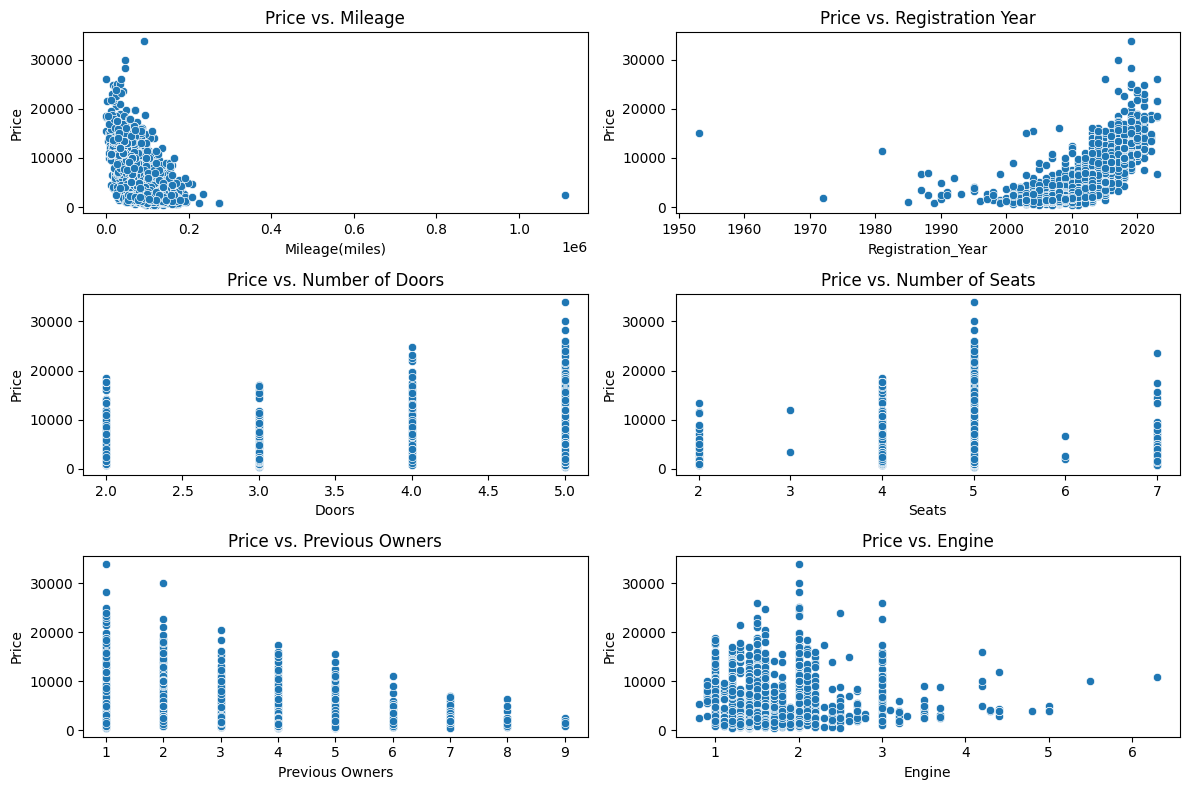

In [9]:
#distributions of variables with respect to price
plt.figure(figsize=(12, 8))

# Scatter plot for Mileage vs Price
plt.subplot(3, 2, 1)
sns.scatterplot(x='Mileage(miles)', y='Price',data=original_df)
plt.title('Price vs. Mileage')

# Scatter plot for Registration Year vs Price
plt.subplot(3, 2, 2)
sns.scatterplot(x='Registration_Year', y='Price',data=original_df)
plt.title('Price vs. Registration Year')

# Scatter plot for doors vs Price
plt.subplot(3, 2, 3)
sns.scatterplot(x='Doors', y='Price',data=original_df)
plt.title('Price vs. Number of Doors')

# Scatter plot for Seats vs Price
plt.subplot(3, 2, 4)
sns.scatterplot(x='Seats', y='Price',data=original_df)
plt.title('Price vs. Number of Seats')

# Scatter plot for Previous Owners vs Price
plt.subplot(3, 2, 5)
sns.scatterplot(x='Previous Owners', y='Price',data=original_df)
plt.title('Price vs. Previous Owners')


# Scatter plot for Engine vs Price
plt.subplot(3, 2, 6)
sns.scatterplot(x='Engine', y='Price',data=original_df)
plt.title('Price vs. Engine')
plt.tight_layout()
plt.show()


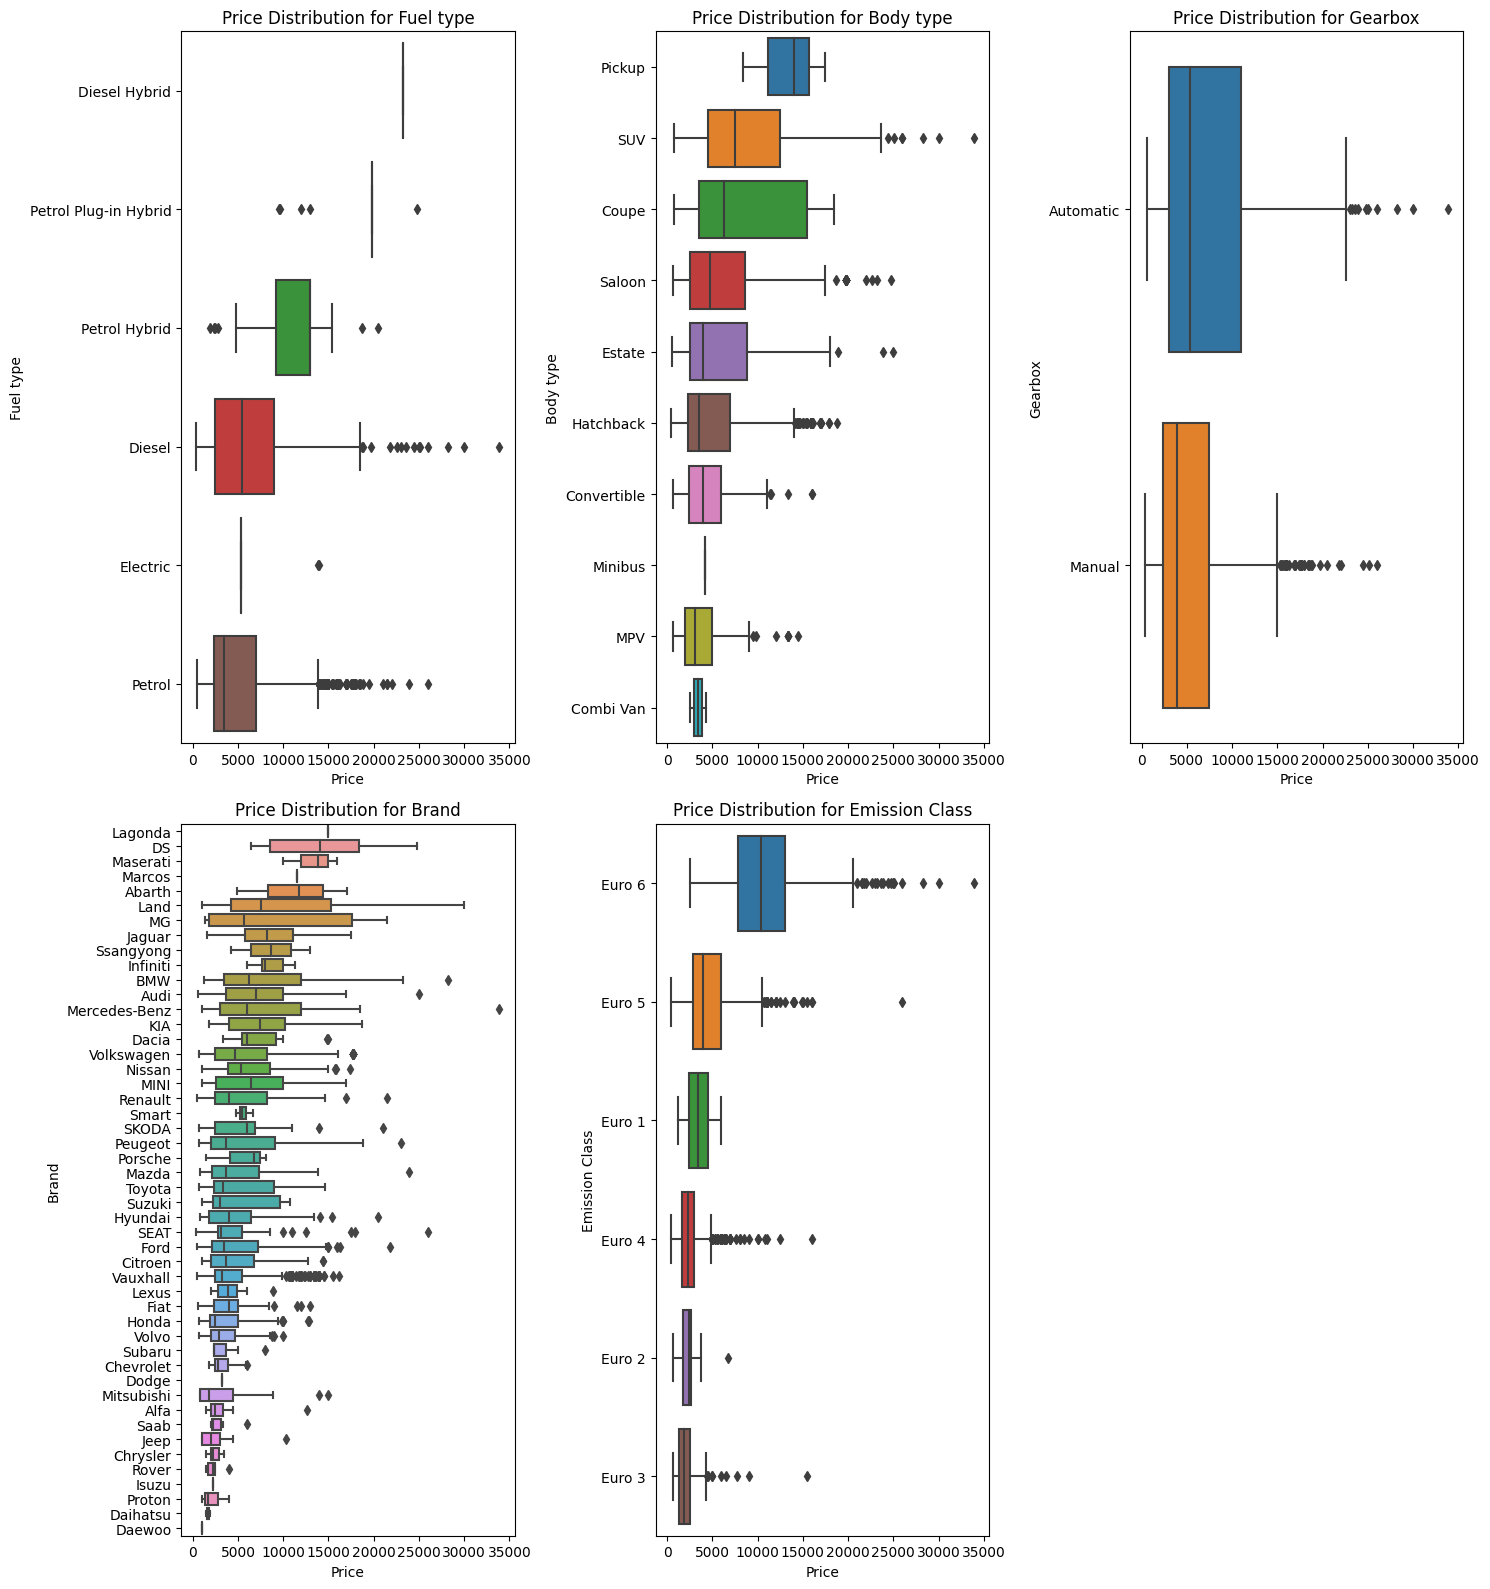

In [10]:
categorical_vars_for_boxplots=['Fuel type', 'Body type', 'Gearbox', 'Brand','Emission Class']


num_rows = 2
num_cols = (len(categorical_vars_for_boxplots) + 1) // num_rows

# Set the figure size dynamically based on the number of subplots
plt.figure(figsize=(15, 8 * num_rows))

# Create box plots for all the updated list of categorical variables, sorted by median price
for i, col in enumerate(categorical_vars_for_boxplots):
    plt.subplot(num_rows, num_cols, i+1)
    ordered_categories = original_df.groupby(col)['Price'].mean().sort_values(ascending=False).index
    sns.boxplot(y=col, x='Price', data=original_df, order=ordered_categories)
    plt.title(f'Price Distribution for {col}')
    plt.xlabel('Price')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

<ipython-input-11-5233580b513d>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_dummies_matrix.corr()


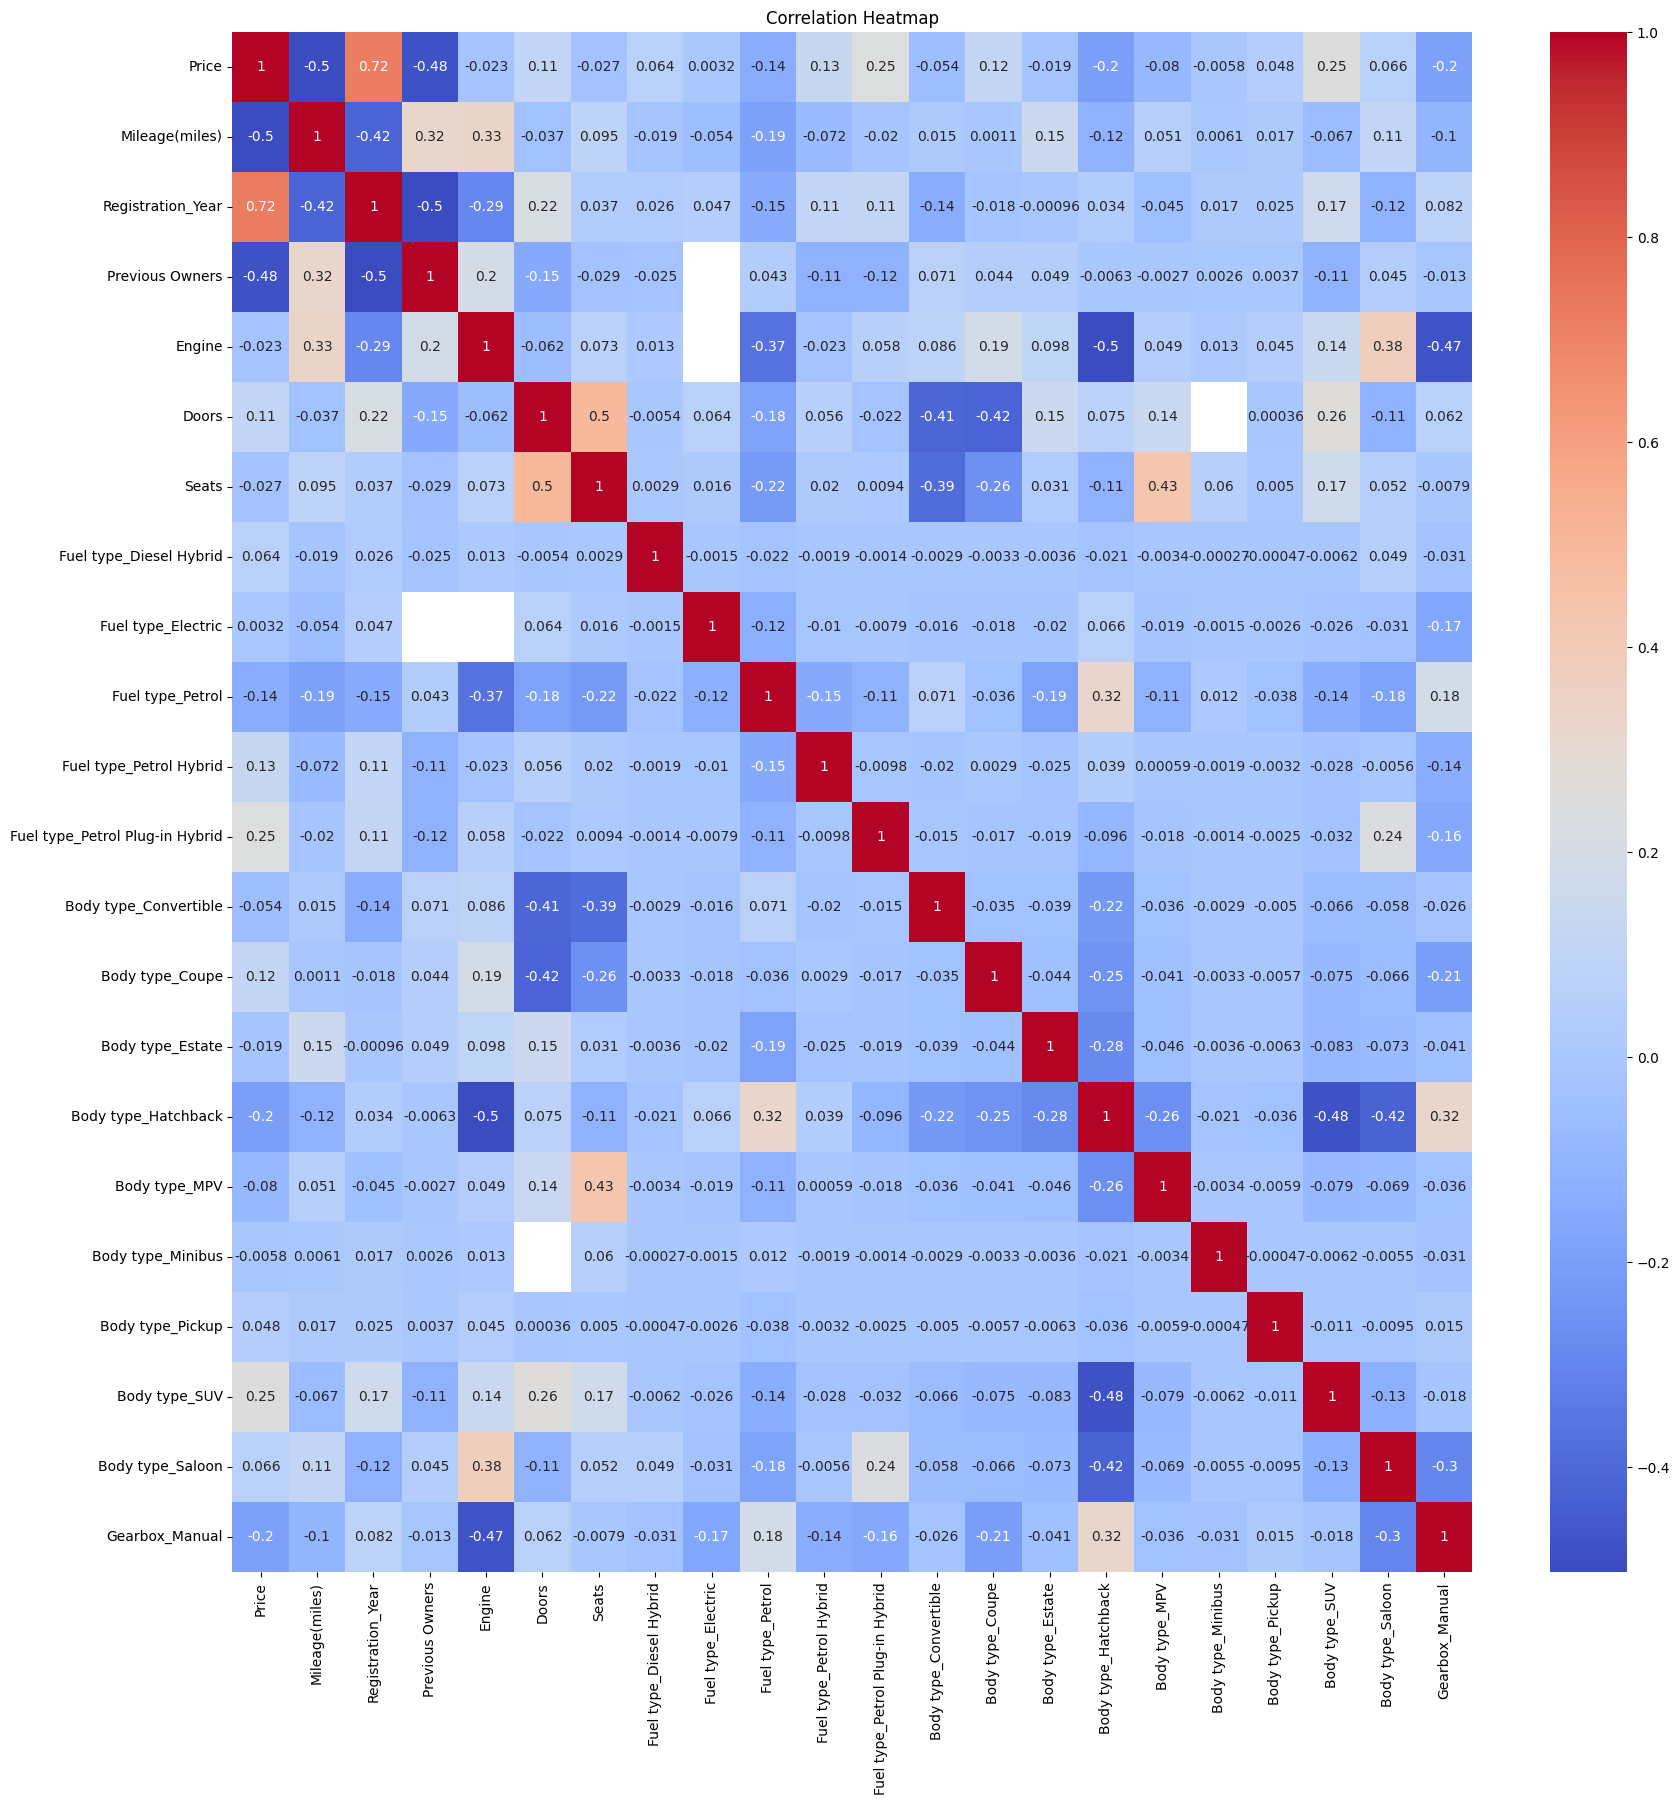

In [11]:
# Generate correlation heatmap
#Select the categorical variables to include in the heatmap
categorical_variables=['Fuel type', 'Body type', 'Gearbox']

# Change to dummy variables
df_dummies_matrix = pd.get_dummies(original_df, columns=categorical_variables, drop_first=True)

# Calculate the correlation matrix for the new dataframe
corr_matrix = df_dummies_matrix.corr()

# Plot the heatmap for all variables including 'Brand'
plt.figure(figsize=(20, 20))
heatmap=sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Data Preperation for Machine Learning**

In [12]:
#A few missing values exist in Engine, Doors, Seats and Emission Class.
# Handling missing values for engine, doors, seats with median
for col in [ 'Previous Owners', 'Engine', 'Doors', 'Seats']:
    original_df[col].fillna(original_df[col].median(), inplace=True)


# Handling missing values for 'Emission Class' with the mode
original_df['Emission Class'].fillna(original_df['Emission Class'].mode()[0], inplace=True)

In [13]:
original_df.isnull().sum()

Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Brand                0
dtype: int64

In [14]:
# Calculate the 99th percentile of the Mileage column
mileage_99th_percentile = original_df['Mileage(miles)'].quantile(0.99)

# Filter out the outliers that are greater than the 99th percentile
original_df = original_df[original_df['Mileage(miles)'] <= mileage_99th_percentile]

# Display the number of rows before and after filtering

num_rows_after = original_df.shape[0]
mileage_99th_percentile, num_rows_after

(171014.4, 3648)

In [15]:
#One hot encoding
# Identify categorical variables for one-hot encoding
categorical_vars = original_df.select_dtypes(include=['object']).columns
categorical_vars
# Perform one-hot encoding
df_encoded = pd.get_dummies(original_df, columns=categorical_vars, drop_first=True)

# Display the first few rows of the dataframe to verify the changes
df_encoded.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,...,Brand_SKODA,Brand_Saab,Brand_Smart,Brand_Ssangyong,Brand_Subaru,Brand_Suzuki,Brand_Toyota,Brand_Vauxhall,Brand_Volkswagen,Brand_Volvo
0,6900,70189,2016,3.0,1.4,5.0,5.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1495,88585,2008,4.0,1.2,3.0,5.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,949,137000,2011,3.0,1.4,5.0,5.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2395,96731,2010,5.0,1.4,3.0,4.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1000,85000,2013,3.0,1.3,5.0,5.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Standardize numeric features
from sklearn.preprocessing import MinMaxScaler

# Separating out the features and target variable
x = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Standardizing the features
scaler = MinMaxScaler()
x_standardized = scaler.fit_transform(x)

# Convert the array back to a dataframe
x_standardized_df = pd.DataFrame(x_standardized, columns=x.columns)

# Display the first few rows of the standardized dataframe
x_standardized_df.head()

,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Fuel type_Diesel Hybrid,Fuel type_Electric,Fuel type_Petrol,Fuel type_Petrol Hybrid,...,Brand_SKODA,Brand_Saab,Brand_Smart,Brand_Ssangyong,Brand_Subaru,Brand_Suzuki,Brand_Toyota,Brand_Vauxhall,Brand_Volkswagen,Brand_Volvo
0,0.410459,0.900000,0.250,0.109091,1.000000,0.6,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.518038,0.785714,0.375,0.072727,0.333333,0.6,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.801168,0.828571,0.250,0.109091,1.000000,0.6,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.565676,0.814286,0.500,0.109091,0.333333,0.4,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.497073,0.857143,0.250,0.090909,1.000000,0.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Building multivariable linear regression**

In [17]:
#Multivariable Linear Regresson
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x_standardized_df, y, test_size=0.2, random_state=42)

# build the Multivariable Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# evaluate the model using R-squared
r2_score_linear = linear_model.score(x_test, y_test)

# extract predicted price
y_pred = linear_model.predict(x_test)

# calculate RSME
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R-squared: {r2_score_linear}')
print(f'RMSE: {rmse}')

R-squared: 0.7707016832367133
RMSE: 2210.4607569328673


In [18]:
#Extract coefficients
coefs = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefs

,Feature,Coefficient
1,Registration_Year,26321.002883
6,Fuel type_Diesel Hybrid,8227.717018
17,Body type_Pickup,7089.544580
10,Fuel type_Petrol Plug-in Hybrid,6158.156631
52,Brand_Maserati,5010.299965
...,...,...
65,Brand_Smart,-4371.256639
24,Emission Class_Euro 5,-4516.575549
23,Emission Class_Euro 4,-4668.786653
66,Brand_Ssangyong,-5003.431733


**Builidng random forest regression model**

In [19]:
from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x_standardized_df, y, test_size=0.2, random_state=42)


# Building the Random Forest Regression Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

# Obtaining the R-squared value for the model on the test set
r_squared_rf = random_forest_model.score(x_test, y_test)

# extract predicted price
y_pred = random_forest_model.predict(x_test)

# calculate RSME
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R-squared: {r_squared_rf}')
print(f'RMSE: {rmse}')

# extract feature importance rank
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

R-squared: 0.8927687354185546
RMSE: 1511.6216020277307


In [20]:
feature_importance_coef_merged = feature_importances.merge(coefs, on='Feature', how='left')
print(feature_importance_coef_merged.head(10))

                 Feature  Importance   Coefficient
0      Registration_Year    0.717007  26321.002883
1         Mileage(miles)    0.062080  -6814.787297
2         Gearbox_Manual    0.055222  -1299.745080
3                 Engine    0.044905   2625.843635
4    Body type_Hatchback    0.023788   -135.193405
5        Previous Owners    0.008560  -1252.754432
6  Emission Class_Euro 6    0.008236  -1951.609095
7  Emission Class_Euro 5    0.007087  -4516.575549
8    Brand_Mercedes-Benz    0.007087    202.113952
9              Brand_BMW    0.006075     42.453604


**Random forest regression and linear regression on different fuel types**

In [21]:
#split the data

# Creating a mask for EVs (not pure petrol or diesel powered)
ev_mask = ~(original_df['Fuel type'].isin(['Petrol', 'Diesel']))

# Splitting the dataset into fuel-powered cars and EVs
fuel_powered_cars = original_df[~ev_mask]
evs = original_df[ev_mask]
evs.info()
fuel_powered_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 14 to 4675
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              106 non-null    int64  
 1   Mileage(miles)     106 non-null    int64  
 2   Registration_Year  106 non-null    int64  
 3   Previous Owners    106 non-null    float64
 4   Fuel type          106 non-null    object 
 5   Body type          106 non-null    object 
 6   Engine             106 non-null    float64
 7   Gearbox            106 non-null    object 
 8   Doors              106 non-null    float64
 9   Seats              106 non-null    float64
 10  Emission Class     106 non-null    object 
 11  Brand              106 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 10.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3542 entries, 0 to 4727
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---

In [22]:
#Multivariable linear regression and random forest for EV cars

#One hot encoding
# Identify categorical variables for one-hot encoding
categorical_vars = evs.select_dtypes(include=['object']).columns
categorical_vars
# Perform one-hot encoding
df_encoded = pd.get_dummies(evs, columns=categorical_vars, drop_first=True)


# Separating out the features and target variable
x = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Standardizing the features
scaler = MinMaxScaler()
x_standardized = scaler.fit_transform(x)

# Convert the array back to a dataframe
x_standardized_df = pd.DataFrame(x_standardized, columns=x.columns)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x_standardized_df, y, test_size=0.2, random_state=42)

# Building the Random Forest Regression Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

# Obtaining the R-squared value for the model on the test set
r_squared_rf = random_forest_model.score(x_test, y_test)

# extract predicted price
y_pred = random_forest_model.predict(x_test)

# calculate RSME
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Random Forest R-squared: {r_squared_rf}')
print(f'Random Forest RMSE: {rmse}')

#Multivariable Linear Regresson

# build the Multivariable Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# evaluate the model using R-squared
r_squared_linear = linear_model.score(x_test, y_test)

# extract predicted price
y_pred = linear_model.predict(x_test)

# calculate RSME
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Linear Regression R-squared: {r_squared_linear}')
print(f'Linear Regression RMSE: {rmse}')

# extract feature importance rank
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# extract coefficients
coefs = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# join feature importance and coefficients
feature_importance_coef_merged = feature_importances.merge(coefs, on='Feature', how='left')

print(feature_importance_coef_merged.head(10))

Random Forest R-squared: 0.9305364948653205
Random Forest RMSE: 1394.1530314332592
Linear Regression R-squared: 0.8196537110113219
Linear Regression RMSE: 2246.3928361975914
                           Feature  Importance   Coefficient
0                Registration_Year    0.727521   6643.476790
1              Body type_Hatchback    0.139386  -3289.644344
2            Emission Class_Euro 6    0.025413   4400.341280
3                            Doors    0.019001  -4895.961166
4                   Mileage(miles)    0.014670 -21299.373538
5                 Body type_Saloon    0.014117    286.184921
6  Fuel type_Petrol Plug-in Hybrid    0.013785   1650.620029
7                  Previous Owners    0.013394   7329.478740
8                           Engine    0.007613  -1750.682874
9                         Brand_DS    0.004750  -3590.806106


In [23]:
#Multivariable linear regression and random forest for non-EV cars

#One hot encoding
# Identify categorical variables for one-hot encoding
categorical_vars = fuel_powered_cars.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(fuel_powered_cars, columns=categorical_vars, drop_first=True)

# Separating out the features and target variable
x = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Standardizing the features
scaler = MinMaxScaler()
x_standardized = scaler.fit_transform(x)

# Convert the array back to a dataframe
x_standardized_df = pd.DataFrame(x_standardized, columns=x.columns)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x_standardized_df, y, test_size=0.2, random_state=42)

# Building the Random Forest Regression Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

# Obtaining the R-squared value for the model on the test set
r_squared_rf = random_forest_model.score(x_test, y_test)

# extract predicted price
y_pred = random_forest_model.predict(x_test)

# calculate RSME
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Random Forest R-squared: {r_squared_rf}')
print(f'Random Forest RMSE: {rmse}')

#Multivariable Linear Regresson

# build the Multivariable Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# evaluate the model using R-squared
r_squared_linear = linear_model.score(x_test, y_test)

# extract predicted price
y_pred = linear_model.predict(x_test)

# calculate RSME
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Linear Regression R-squared: {r_squared_linear}')
print(f'Linear Regression RMSE: {rmse}')

# extract feature importance rank
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# extract coefficients
coefs = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# join feature importance and coefficients
feature_importance_coef_merged = feature_importances.merge(coefs, on='Feature', how='left')

print(feature_importance_coef_merged.head(10))

Random Forest R-squared: 0.8825123880317617
Random Forest RMSE: 1581.6376830777745
Linear Regression R-squared: -3.5048921686629362e+22
Linear Regression RMSE: 863869808213595.2
                 Feature  Importance   Coefficient
0      Registration_Year    0.708690  25905.438448
1         Mileage(miles)    0.072471  -6986.730153
2         Gearbox_Manual    0.051035  -1275.014404
3                 Engine    0.047415   3577.591295
4    Body type_Hatchback    0.019488  -1315.017503
5  Emission Class_Euro 5    0.009511  -5489.475484
6        Previous Owners    0.008364  -1141.459942
7  Emission Class_Euro 6    0.007625  -2932.394672
8             Brand_Audi    0.007601     28.002579
9              Brand_BMW    0.006860   -820.801978


**Random forest regression and linear regression for luxury and non luxury brands**

In [24]:
# Define a list of luxury brands.
luxury_brands = ['BMW','Mercedes-Benz','Audi','Lexus','Jaguar','Land','Maserati','Porsche','Infiniti','Volvo','Alfa','DS','Lagonda']

# Create a mask for luxury brands
luxury_mask = original_df['Brand'].isin(luxury_brands)

# Split the dataset into normal and luxury brands
normal_brands_df = original_df[~luxury_mask]
luxury_brands_df = original_df[luxury_mask]

normal_brands_df.info()
luxury_brands_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2935 entries, 0 to 4727
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              2935 non-null   int64  
 1   Mileage(miles)     2935 non-null   int64  
 2   Registration_Year  2935 non-null   int64  
 3   Previous Owners    2935 non-null   float64
 4   Fuel type          2935 non-null   object 
 5   Body type          2935 non-null   object 
 6   Engine             2935 non-null   float64
 7   Gearbox            2935 non-null   object 
 8   Doors              2935 non-null   float64
 9   Seats              2935 non-null   float64
 10  Emission Class     2935 non-null   object 
 11  Brand              2935 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 298.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 14 to 4725
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
--

In [25]:
#Multivariable linear regression and random forest for luxury brands

#One hot encoding
# Identify categorical variables for one-hot encoding
categorical_vars = luxury_brands_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(luxury_brands_df, columns=categorical_vars, drop_first=True)

# Separating out the features and target variable
x = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Standardizing the features
scaler = MinMaxScaler()
x_standardized = scaler.fit_transform(x)

# Convert the array back to a dataframe
x_standardized_df = pd.DataFrame(x_standardized, columns=x.columns)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x_standardized_df, y, test_size=0.2, random_state=42)

# Building the Random Forest Regression Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

# Obtaining the R-squared value for the model on the test set
r_squared_rf = random_forest_model.score(x_test, y_test)

# extract predicted price
y_pred = random_forest_model.predict(x_test)

# calculate RSME
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Random Forest R-squared: {r_squared_rf}')
print(f'Random Forest RMSE: {rmse}')

#Multivariable Linear Regresson

# build the Multivariable Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# evaluate the model using R-squared
r_squared_linear = linear_model.score(x_test, y_test)

# extract predicted price
y_pred = linear_model.predict(x_test)

# calculate RSME
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Linear Regression R-squared: {r_squared_linear}')
print(f'Linear Regression RMSE: {rmse}')

# extract feature importance rank
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# extract coefficients
coefs = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# join feature importance and coefficients
feature_importance_coef_merged = feature_importances.merge(coefs, on='Feature', how='left')

print(feature_importance_coef_merged.head(10))

Random Forest R-squared: 0.9110954065732498
Random Forest RMSE: 1726.1122007693345
Linear Regression R-squared: 0.8667987948307042
Linear Regression RMSE: 2112.812702909977
                 Feature  Importance   Coefficient
0      Registration_Year    0.753243  32007.922659
1         Mileage(miles)    0.081940  -8461.243091
2                 Engine    0.032617   4776.466523
3         Gearbox_Manual    0.028432  -1637.255661
4  Emission Class_Euro 6    0.014068   4819.707325
5    Body type_Hatchback    0.010899  -1484.448612
6             Brand_Land    0.009587   3452.796044
7         Brand_Maserati    0.009270   5465.018100
8        Previous Owners    0.009223    -44.077182
9          Body type_SUV    0.006077   -276.493931


In [26]:
#Multivariable rinear regression and random forest for normal brands

#One hot encoding
# Identify categorical variables for one-hot encoding
categorical_vars = normal_brands_df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(normal_brands_df, columns=categorical_vars, drop_first=True)

# Separating out the features and target variable
x = df_encoded.drop('Price', axis=1)
y = df_encoded['Price']

# Standardizing the features
scaler = MinMaxScaler()
x_standardized = scaler.fit_transform(x)

# Convert the array back to a dataframe
x_standardized_df = pd.DataFrame(x_standardized, columns=x.columns)

#train test split
x_train, x_test, y_train, y_test = train_test_split(x_standardized_df, y, test_size=0.2, random_state=42)

# Building the Random Forest Regression Model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train, y_train)

# Obtaining the R-squared value for the model on the test set
r_squared_rf = random_forest_model.score(x_test, y_test)

# extract predicted price
y_pred = random_forest_model.predict(x_test)

# calculate RSME
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Random Forest R-squared: {r_squared_rf}')
print(f'Random Forest RMSE: {rmse}')

#Multivariable Linear Regresson

# build the Multivariable Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# evaluate the model using R-squared
r_squared_linear = linear_model.score(x_test, y_test)

# extract predicted price
y_pred = linear_model.predict(x_test)

# calculate RSME
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Linear Regression R-squared: {r_squared_linear}')
print(f'Linear Regression RMSE: {rmse}')

# extract feature importance rank
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# extract coefficients
coefs = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': linear_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# join feature importance and coefficients
feature_importance_coef_merged = feature_importances.merge(coefs, on='Feature', how='left')

print(feature_importance_coef_merged.head(10))

Random Forest R-squared: 0.9314634267725729
Random Forest RMSE: 1074.8133229450614
Linear Regression R-squared: 0.875090061494898
Linear Regression RMSE: 1451.009798778893
                 Feature  Importance   Coefficient
0      Registration_Year    0.795644  20178.702870
1         Mileage(miles)    0.072236  -6500.434114
2                 Engine    0.026164   3350.776241
3          Body type_SUV    0.016125   1290.664127
4  Emission Class_Euro 5    0.009579  -5106.677857
5    Body type_Hatchback    0.009489   -672.105434
6       Brand_Volkswagen    0.009350  -2174.356074
7         Gearbox_Manual    0.009209   -971.063969
8        Previous Owners    0.006692  -1197.082382
9         Brand_Vauxhall    0.005379  -4431.707361
